# 1. Data input and cleaning

In [1]:
# Display the current working directory
getwd();
# If necessary, change the path below to the directory where the data files are stored. 
# "." means current directory. On Windows use a forward slash / instead of the usual \.
workingDir = ".";
setwd(workingDir); 
# Load the WGCNA package
library(WGCNA);
# The following setting is important, do not omit.
options(stringsAsFactors = FALSE);
#Read in the female liver data set
expData = read.csv("./data/avrRps4_exp.csv", row.names="target_id");

[1] "/home/ezy/projects/WGCNA_avrRps4"

Loading required package: dynamicTreeCut

Loading required package: fastcluster


Attaching package: ‘fastcluster’


The following object is masked from ‘package:stats’:

    hclust





Attaching package: ‘WGCNA’


The following object is masked from ‘package:stats’:

    cor




In [2]:
datExpr0 = as.data.frame(t(expData[,]));

In [3]:
gsg = goodSamplesGenes(datExpr0, verbose = 3);

 Flagging genes and samples with too many missing values...
  ..step 1
  ..Excluding 3129 genes from the calculation due to too many missing samples or zero variance.
  ..step 2


In [4]:
if (!gsg$allOK)
{
# Optionally, print the gene and sample names that were removed:
if (sum(!gsg$goodGenes)>0)
# printFlush(paste("Removing genes:", paste(names(datExpr0)[!gsg$goodGenes], collapse = ", ")));
if (sum(!gsg$goodSamples)>0)
# printFlush(paste("Removing samples:", paste(rownames(datExpr0)[!gsg$goodSamples], collapse = ", ")));
# Remove the offending genes and samples from the data:
datExpr0 = datExpr0[gsg$goodSamples, gsg$goodGenes]
}

In [5]:
# missing이 많은 유전자 개수
length(names(datExpr0)[!gsg$goodGenes])

[1] 3129

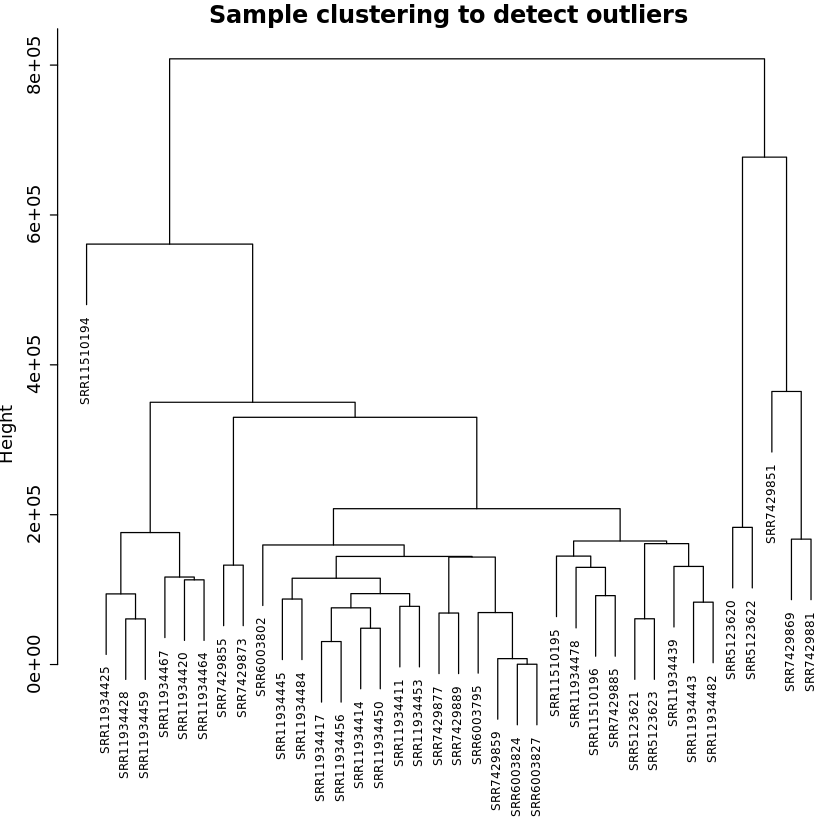

In [6]:
sampleTree = hclust(dist(datExpr0), method = "average");
# Plot the sample tree: Open a graphic output window of size 12 by 9 inches
# The user should change the dimensions if the window is too large or too small.
# sizeGrWindow(12,9)
# pdf(file = "Plots/sampleClustering.pdf", width = 12, height = 9);
par(cex = 0.6);
par(mar = c(0,4,2,0))
plot(sampleTree, main = "Sample clustering to detect outliers", sub="", xlab="", cex.lab = 1.5, 
     cex.axis = 1.5, cex.main = 2)

In [7]:
# 딱히 모난 샘플이 없어서 걸러낸 샘플 0
datExpr = datExpr0
nGenes = ncol(datExpr)
nSamples = nrow(datExpr)

In [8]:
traitData = read.csv("./data/sampleInfo_fix.csv");

In [9]:
allTraits = traitData[,];

In [10]:
avrRps4Samples = rownames(datExpr);
traitRows = match(avrRps4Samples, allTraits$Run);

In [11]:
datTraits = allTraits[traitRows, -1];

In [12]:
rownames(datTraits) = allTraits[traitRows, 1];

In [13]:
collectGarbage();

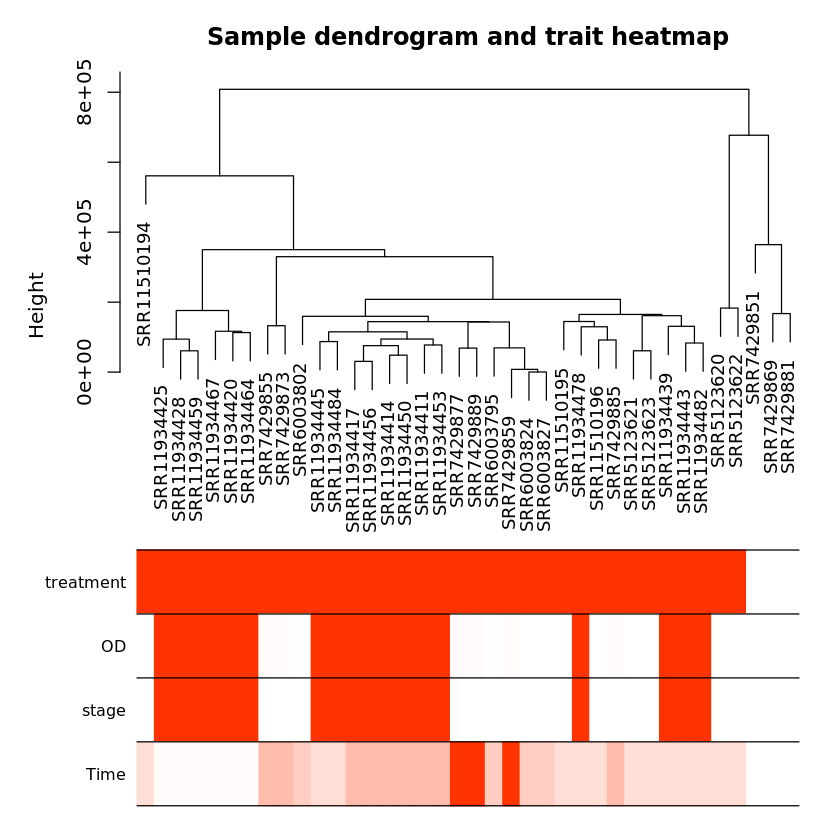

In [14]:
# Re-cluster samples
sampleTree2 = hclust(dist(datExpr), method = "average")
# Convert traits to a color representation: white means low, red means high, grey means missing entry
traitColors = numbers2colors(datTraits, signed = FALSE);
# Plot the sample dendrogram and the colors underneath.
plotDendroAndColors(sampleTree2, traitColors,
                    groupLabels = names(datTraits), 
                    main = "Sample dendrogram and trait heatmap")


In [15]:
save(datExpr, datTraits, file = "AvrRps4-01-dataInput.RData")

------

# 2.a Automatic network construction and module detection

pickSoftThreshold: will use block size 1674.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 1674 of 26713


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 1 : 1674 .”


   ..working on genes 1675 through 3348 of 26713


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 1675 : 3348 .”


   ..working on genes 3349 through 5022 of 26713


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 3349 : 5022 .”


   ..working on genes 5023 through 6696 of 26713


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 5023 : 6696 .”


   ..working on genes 6697 through 8370 of 26713


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 6697 : 8370 .”


   ..working on genes 8371 through 10044 of 26713


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 8371 : 10044 .”


   ..working on genes 10045 through 11718 of 26713


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 10045 : 11718 .”


   ..working on genes 11719 through 13392 of 26713


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 11719 : 13392 .”


   ..working on genes 13393 through 15066 of 26713


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 13393 : 15066 .”


   ..working on genes 15067 through 16740 of 26713


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 15067 : 16740 .”


   ..working on genes 16741 through 18414 of 26713


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 16741 : 18414 .”


   ..working on genes 18415 through 20088 of 26713


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 18415 : 20088 .”


   ..working on genes 20089 through 21762 of 26713


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 20089 : 21762 .”


   ..working on genes 21763 through 23436 of 26713


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 21763 : 23436 .”


   ..working on genes 23437 through 25110 of 26713


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 23437 : 25110 .”


   ..working on genes 25111 through 26713 of 26713


Warning message in eval(xpr, envir = envir):
“Some correlations are NA in block 25111 : 26713 .”


   Power SFT.R.sq  slope truncated.R.sq mean.k. median.k. max.k.
1      1    0.105  0.142          0.828    7920    9020.0  13900
2      2    0.321 -0.207          0.876    4640    4750.0  10300
3      3    0.638 -0.354          0.786    3170    2840.0   8190
4      4    0.762 -0.459          0.765    2340    1820.0   6800
5      5    0.796 -0.541          0.748    1800    1220.0   5800
6      6    0.805 -0.610          0.749    1430     849.0   5030
7      7    0.803 -0.667          0.755    1170     611.0   4420
8      8    0.799 -0.718          0.763     966     448.0   3920
9      9    0.798 -0.766          0.775     811     340.0   3510
10    10    0.794 -0.809          0.782     690     266.0   3160
11    12    0.783 -0.885          0.796     514     163.0   2610
12    14    0.767 -0.961          0.805     394     105.0   2190
13    16    0.765 -1.020          0.822     310      75.6   1870
14    18    0.759 -1.070          0.836     248      54.9   1610
15    20    0.754 -1.110 

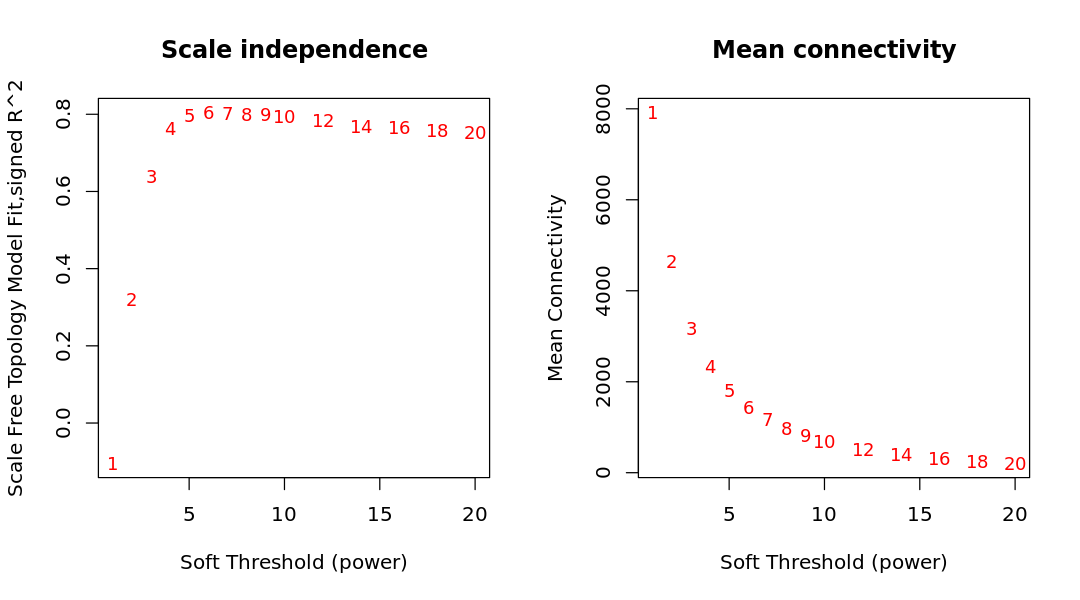

In [82]:
# Choose a set of soft-thresholding powers
powers = c(c(1:10), seq(from = 12, to=20, by=2))
# Call the network topology analysis function
sft = pickSoftThreshold(datExpr, powerVector = powers, verbose = 5)
# Plot the results:
options(repr.plot.width=9, repr.plot.height=5)
par(mfrow = c(1,2));
cex1 = 0.9;
# Scale-free topology fit index as a function of the soft-thresholding power
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
     main = paste("Scale independence"));
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
     labels=powers,cex=cex1,col="red");
# this line corresponds to using an R^2 cut-off of h
abline(h=0.90,col="red")
# Mean connectivity as a function of the soft-thresholding power
plot(sft$fitIndices[,1], sft$fitIndices[,5],
     xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
     main = paste("Mean connectivity"))
text(sft$fitIndices[,1], sft$fitIndices[,5], labels=powers, cex=cex1,col="red")

In [16]:
softPower = 7;
adjacency = adjacency(datExpr, power = softPower);

In [17]:
# Turn adjacency into topological overlap
TOM = TOMsimilarity(adjacency);
dissTOM = 1-TOM

..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


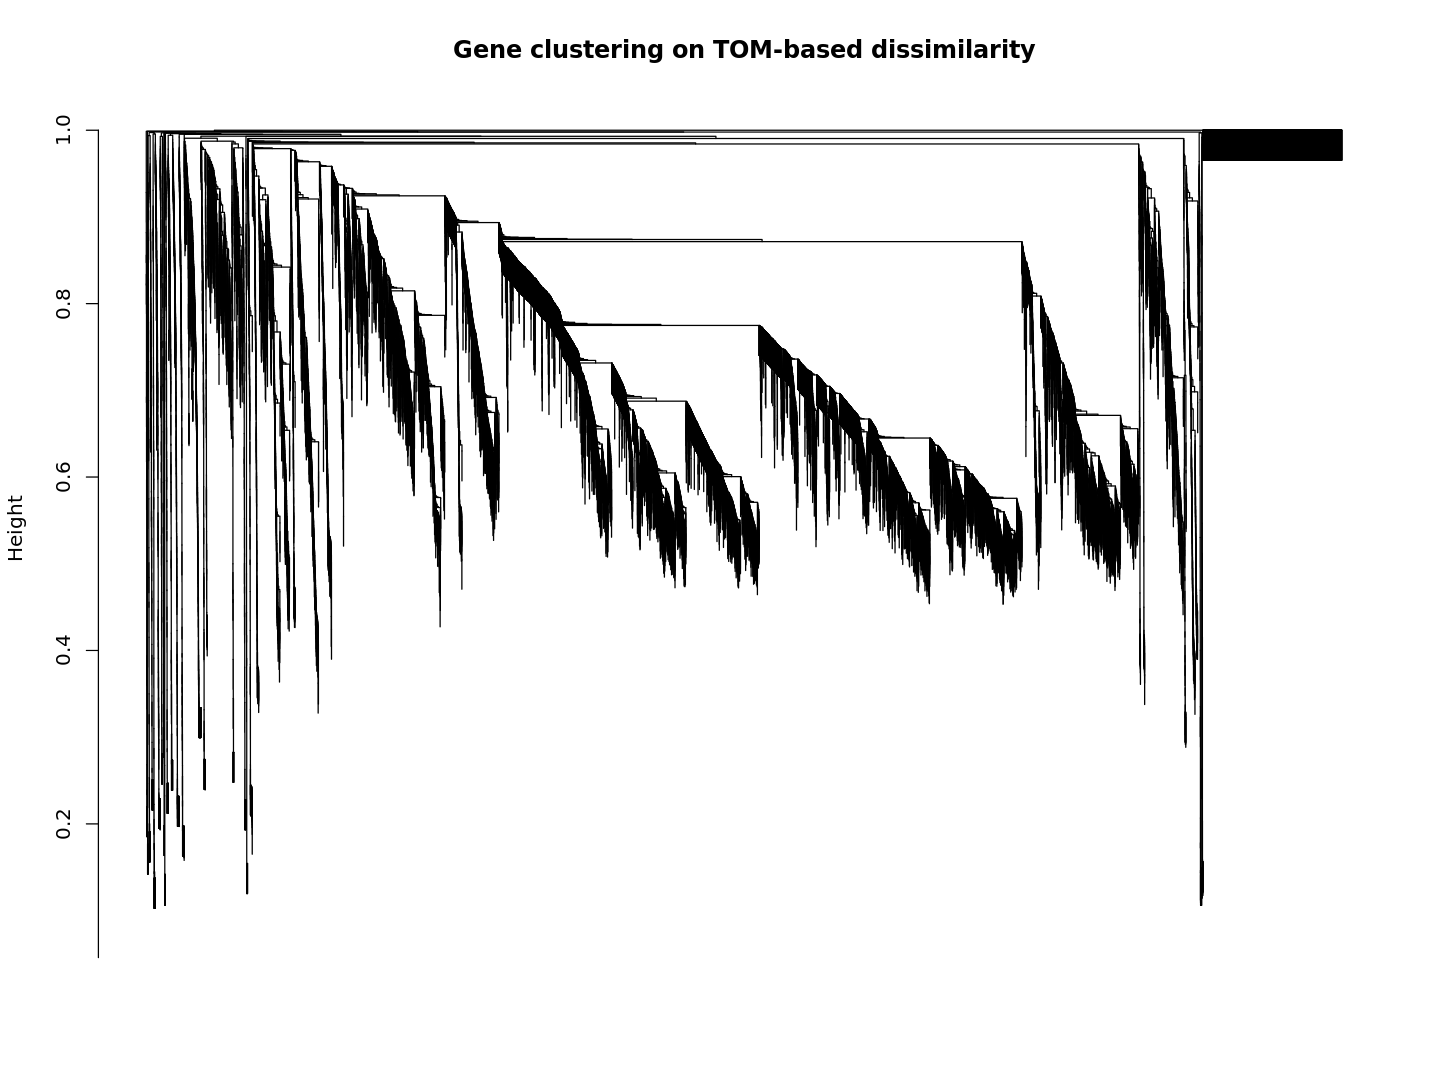

In [18]:
# Call the hierarchical clustering function
geneTree = hclust(as.dist(dissTOM), method = "average");
# Plot the resulting clustering tree (dendrogram)
options(repr.plot.width=12, repr.plot.height=9)
plot(geneTree, xlab="", sub="", main="Gene clustering on TOM-based dissimilarity",
    labels=FALSE, hang=0.04);

In [19]:
# We like large modules, so we set the minimum module size relatively high:
minModuleSize = 30;
# Module identification using dynamic tree cut:
dynamicMods = cutreeDynamic(dendro = geneTree, distM = dissTOM,
                deepSplit = 2, pamRespectsDendro = FALSE,
                minClusterSize = minModuleSize);
table(dynamicMods)

 ..cutHeight not given, setting it to 0.995  ===>  99% of the (truncated) height range in dendro.
 ..done.


dynamicMods
   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
3108 4873 2465 2341 1847 1431  848  834  766  764  647  505  487  378  313  288 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
 253  211  200  199  185  159  157  149  147  146  139  136  131  126  114  114 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
 110  104  103  103  102  102  100   99   98   98   95   81   81   72   71   67 
  48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63 
  64   59   57   57   50   48   46   45   45   42   41   41   40   37   33   31 
  64 
  30 

dynamicColors
  antiquewhite4         bisque4           black            blue           brown 
             37              67             834            2465            2341 
         brown4          coral1          coral2            cyan       darkgreen 
             71              40              33             313             157 
       darkgrey     darkmagenta  darkolivegreen      darkorange     darkorange2 
            147             103             104             139              72 
        darkred   darkseagreen4   darkslateblue   darkturquoise     floralwhite 
            159              41              64             149              81 
          green     greenyellow            grey          grey60       honeydew1 
           1431             505            3108             211              41 
          ivory  lavenderblush3       lightcyan      lightcyan1      lightgreen 
             81              42             253              95             200 
     lightpink

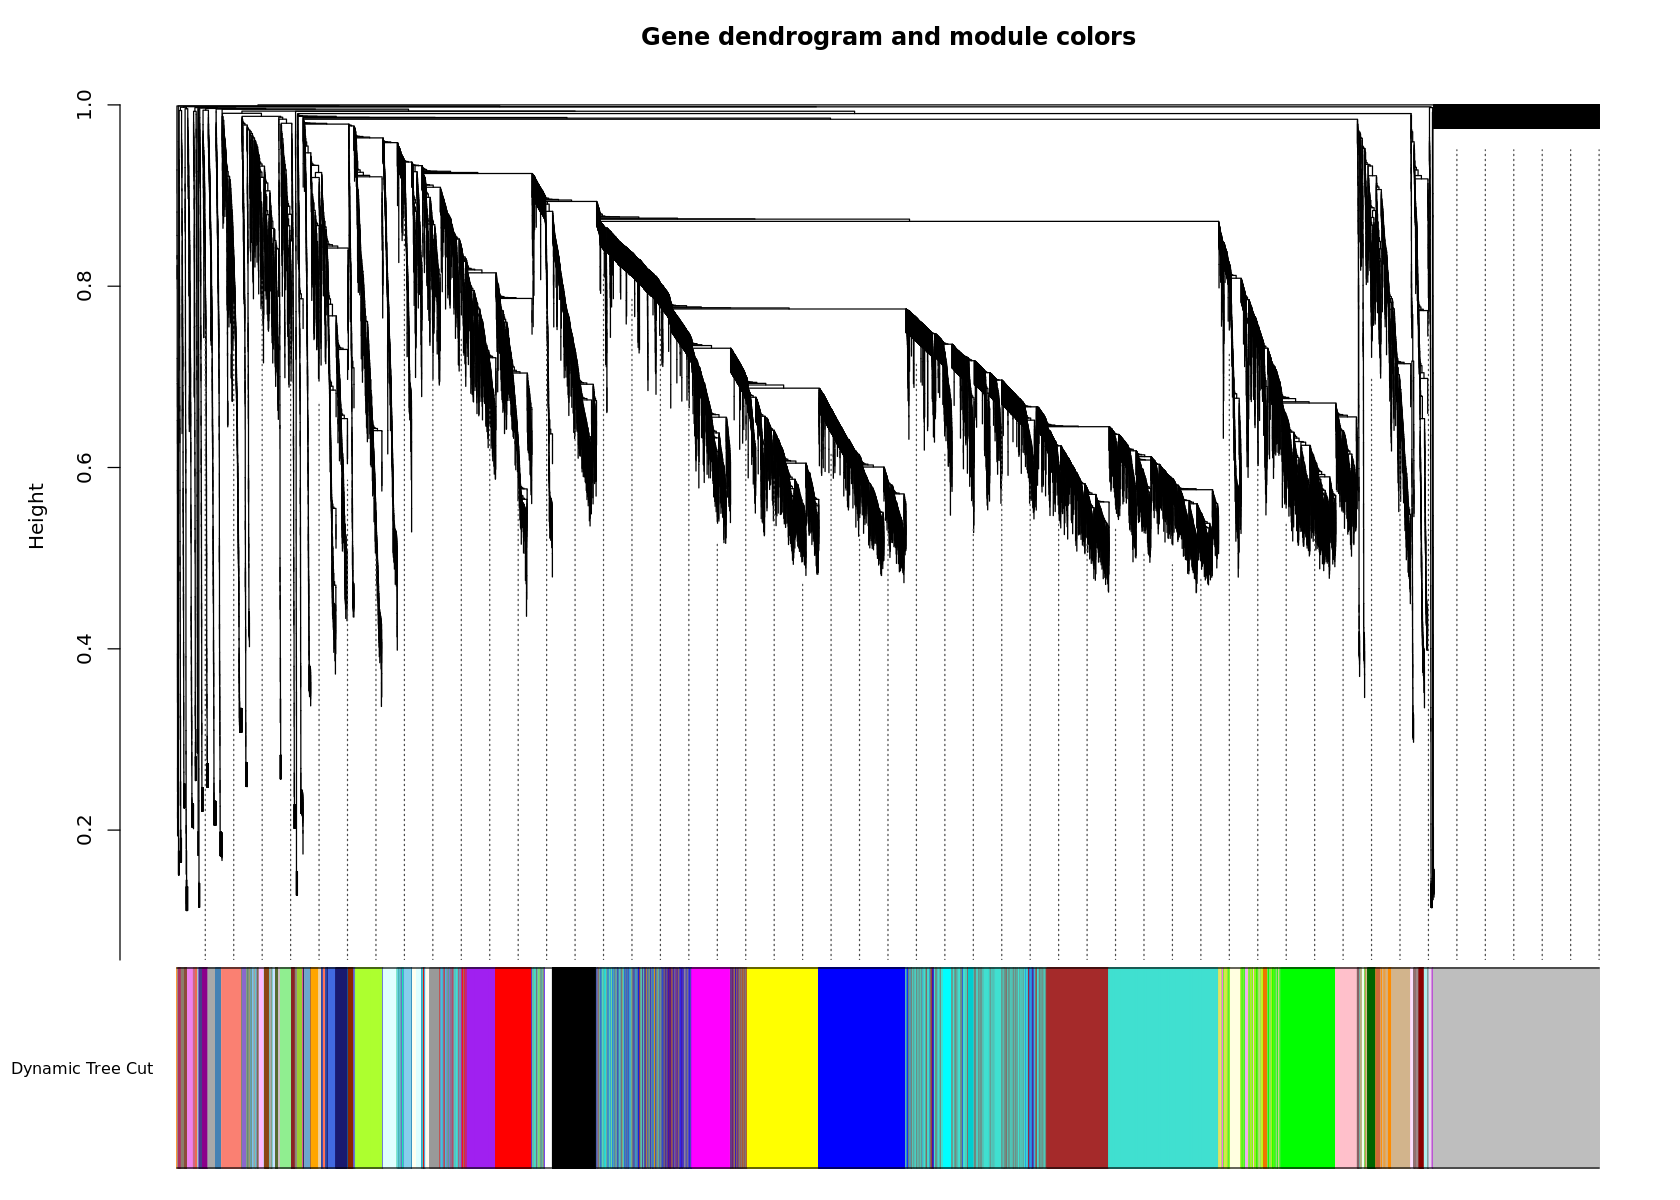

In [20]:
# Convert numeric lables into colors
dynamicColors = labels2colors(dynamicMods)
table(dynamicColors)
# Plot the dendrogram and colors underneath
options(repr.plot.width=14, repr.plot.height=10)
plotDendroAndColors(geneTree, dynamicColors, "Dynamic Tree Cut",
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05,
                    main = "Gene dendrogram and module colors")

write.csv(table(dynamicColors), 'module_count.csv', row.names=FALSE)

 mergeCloseModules: Merging modules whose distance is less than 0
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 65 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 65 module eigengenes in given set.
      ..principal component calculation for module grey failed with the following error:
           Error in svd(datModule, nu = min(n, p, nPC), nv = min(n, p, nPC)) : 
  infinite or missing values in 'x'
       ..hub genes will be used instead of principal components.


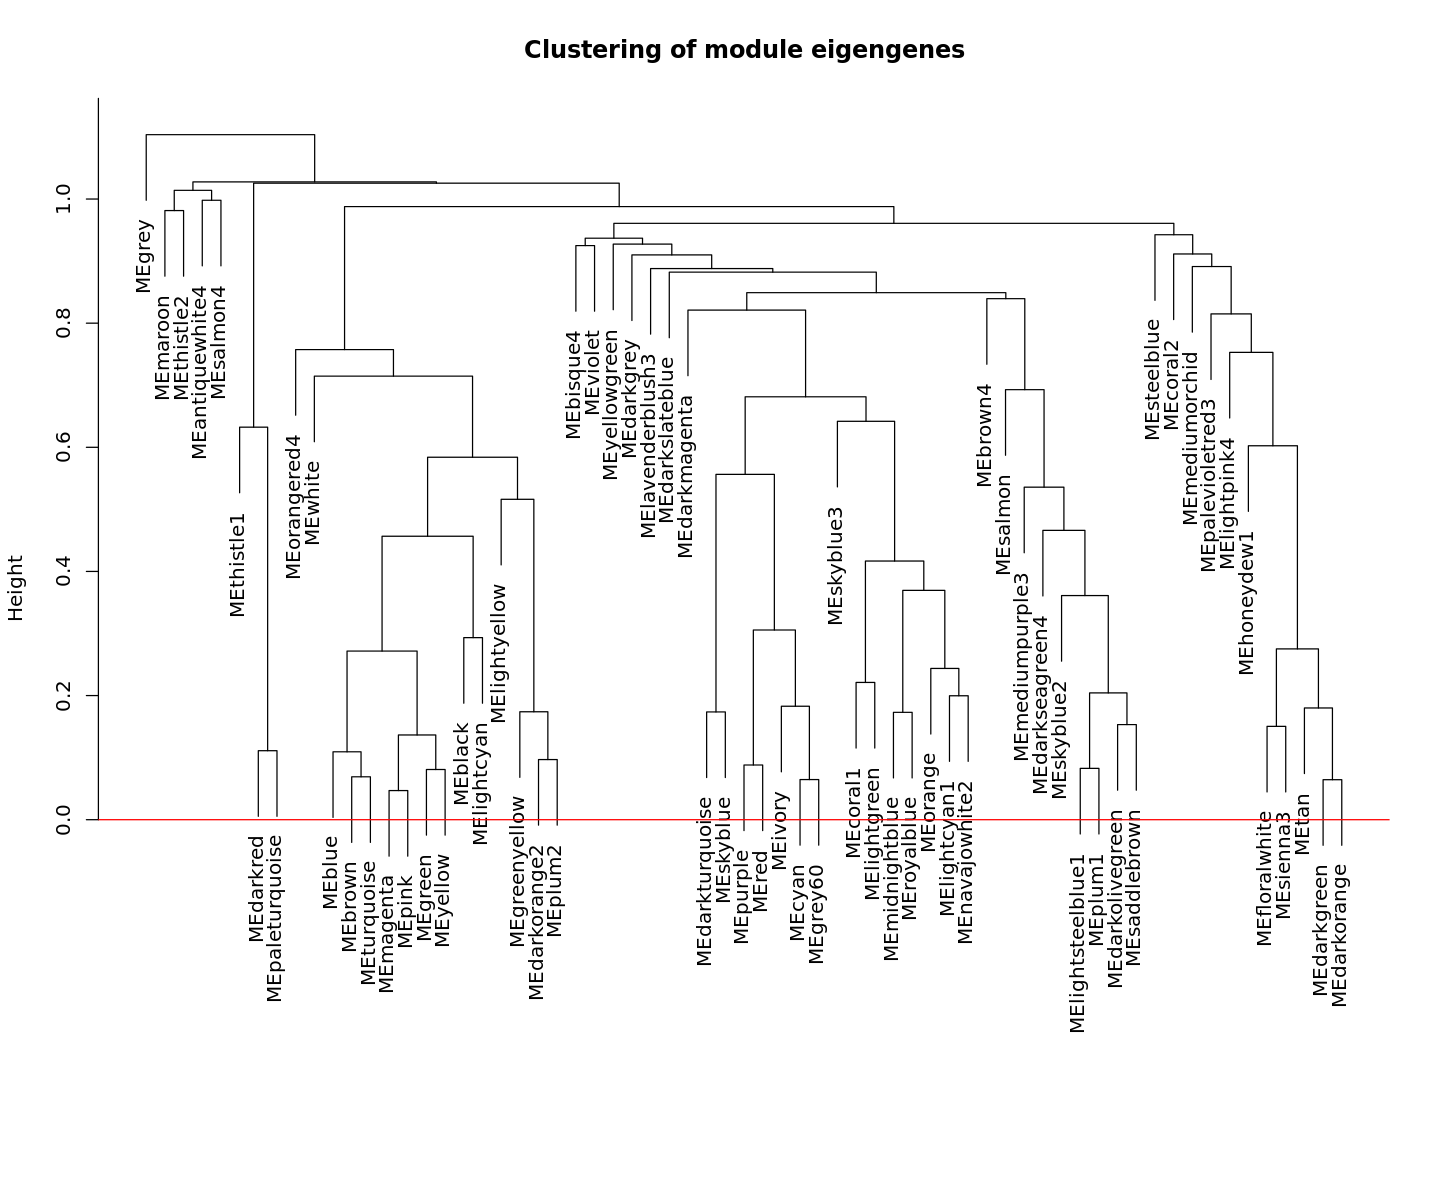

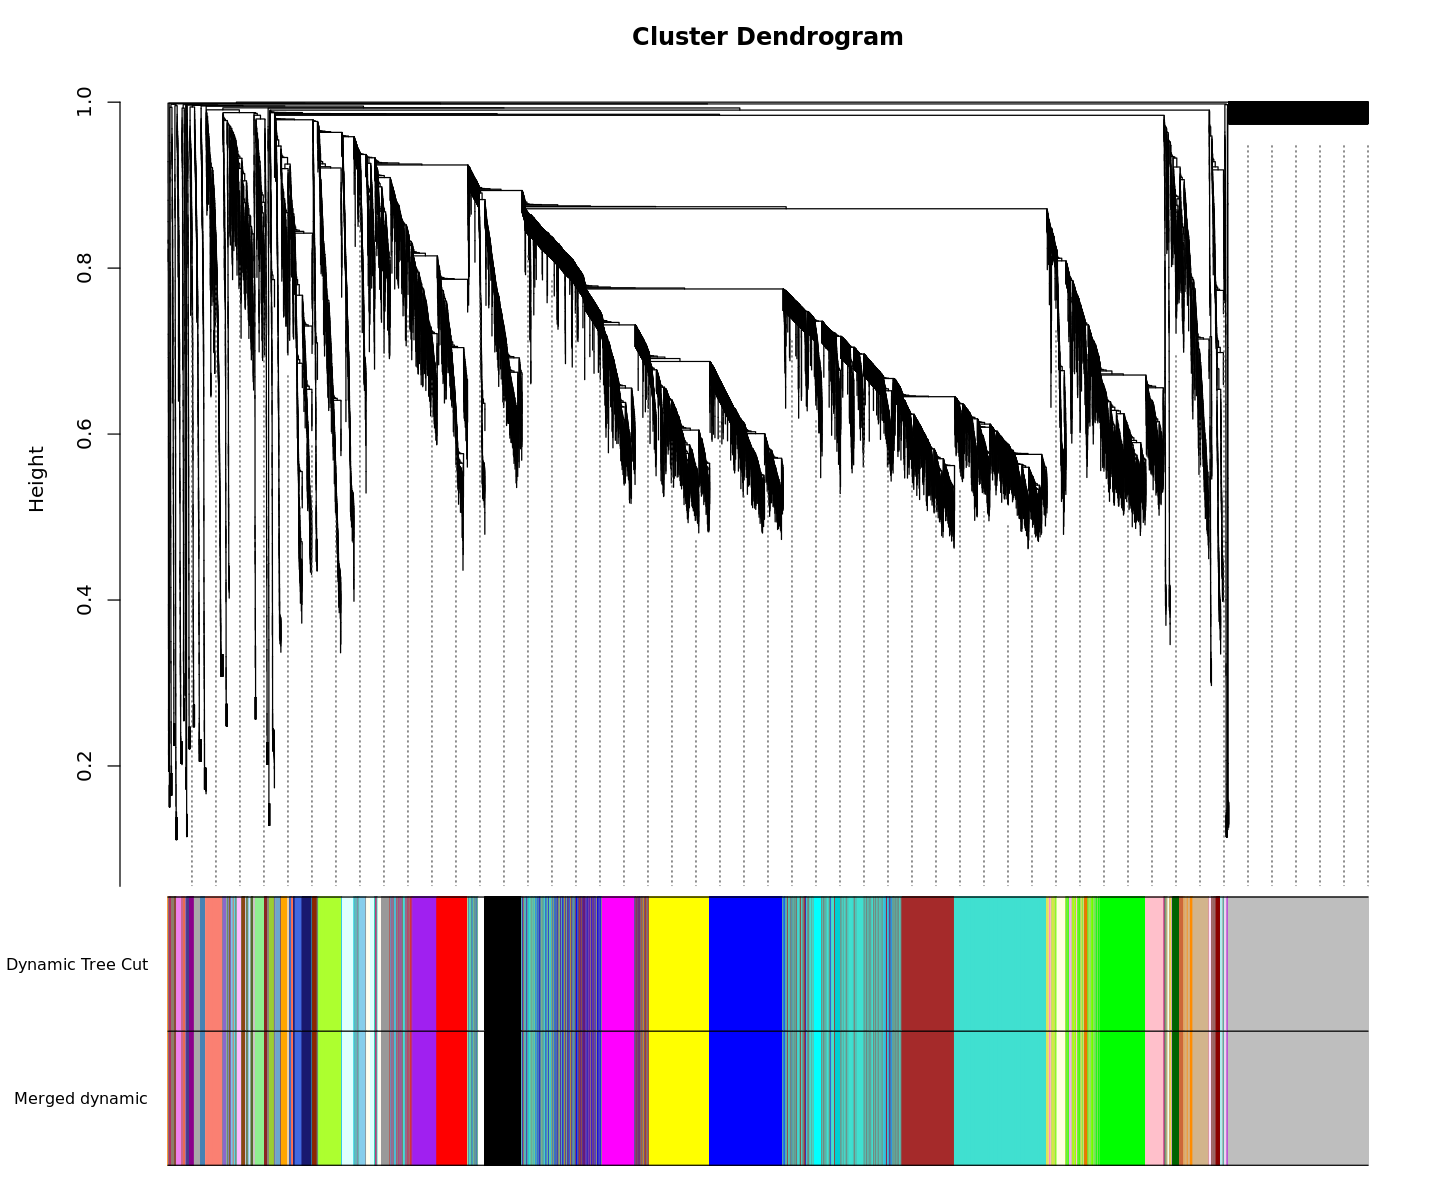

In [42]:
# Calculate eigengenes
MEList = moduleEigengenes(datExpr, colors = dynamicColors)
MEs = MEList$eigengenes
# Calculate dissimilarity of module eigengenes
MEDiss = 1-cor(MEs);
# Cluster module eigengenes
METree = hclust(as.dist(MEDiss), method = "average");
# Plot the result
options(repr.plot.width=12, repr.plot.height=10)
plot(METree, main = "Clustering of module eigengenes",
     xlab = "", sub = "")

MEDissThres = 0
# Plot the cut line into the dendrogram
abline(h=MEDissThres, col = "red")
# Call an automatic merging function
merge = mergeCloseModules(datExpr, dynamicColors, cutHeight = MEDissThres, verbose = 3)
# The merged module colors
mergedColors = merge$colors;
# Eigengenes of the new merged modules:
mergedMEs = merge$newMEs;
options(repr.plot.width=12, repr.plot.height=10)
#pdf(file = "Plots/geneDendro-3.pdf", wi = 9, he = 6)
plotDendroAndColors(geneTree, cbind(dynamicColors, mergedColors),
                    c("Dynamic Tree Cut", "Merged dynamic"),
                    dendroLabels = FALSE, hang = 0.03,
                    addGuide = TRUE, guideHang = 0.05)
#dev.off()

In [43]:
# Rename to moduleColors
moduleColors = mergedColors
# Construct numerical labels corresponding to the colors
colorOrder = c("grey", standardColors(50));
moduleLabels = match(moduleColors, colorOrder)-1;
MEs = mergedMEs;
# Save module colors and labels for use in subsequent parts
save(MEs, moduleLabels, moduleColors, geneTree, file = "AvrRps4-02-networkConstruction-stepByStep.RData")

-----

# 3. Relating modules to external information and identifying important genes

In [44]:
# Define numbers of genes and samples
nGenes = ncol(datExpr);
nSamples = nrow(datExpr);
# Recalculate MEs with color labels
MEs0 = moduleEigengenes(datExpr, moduleColors)$eigengenes
MEs = orderMEs(MEs0)
moduleTraitCor = cor(MEs, datTraits, use = "p");
moduleTraitPvalue = corPvalueStudent(moduleTraitCor, nSamples);

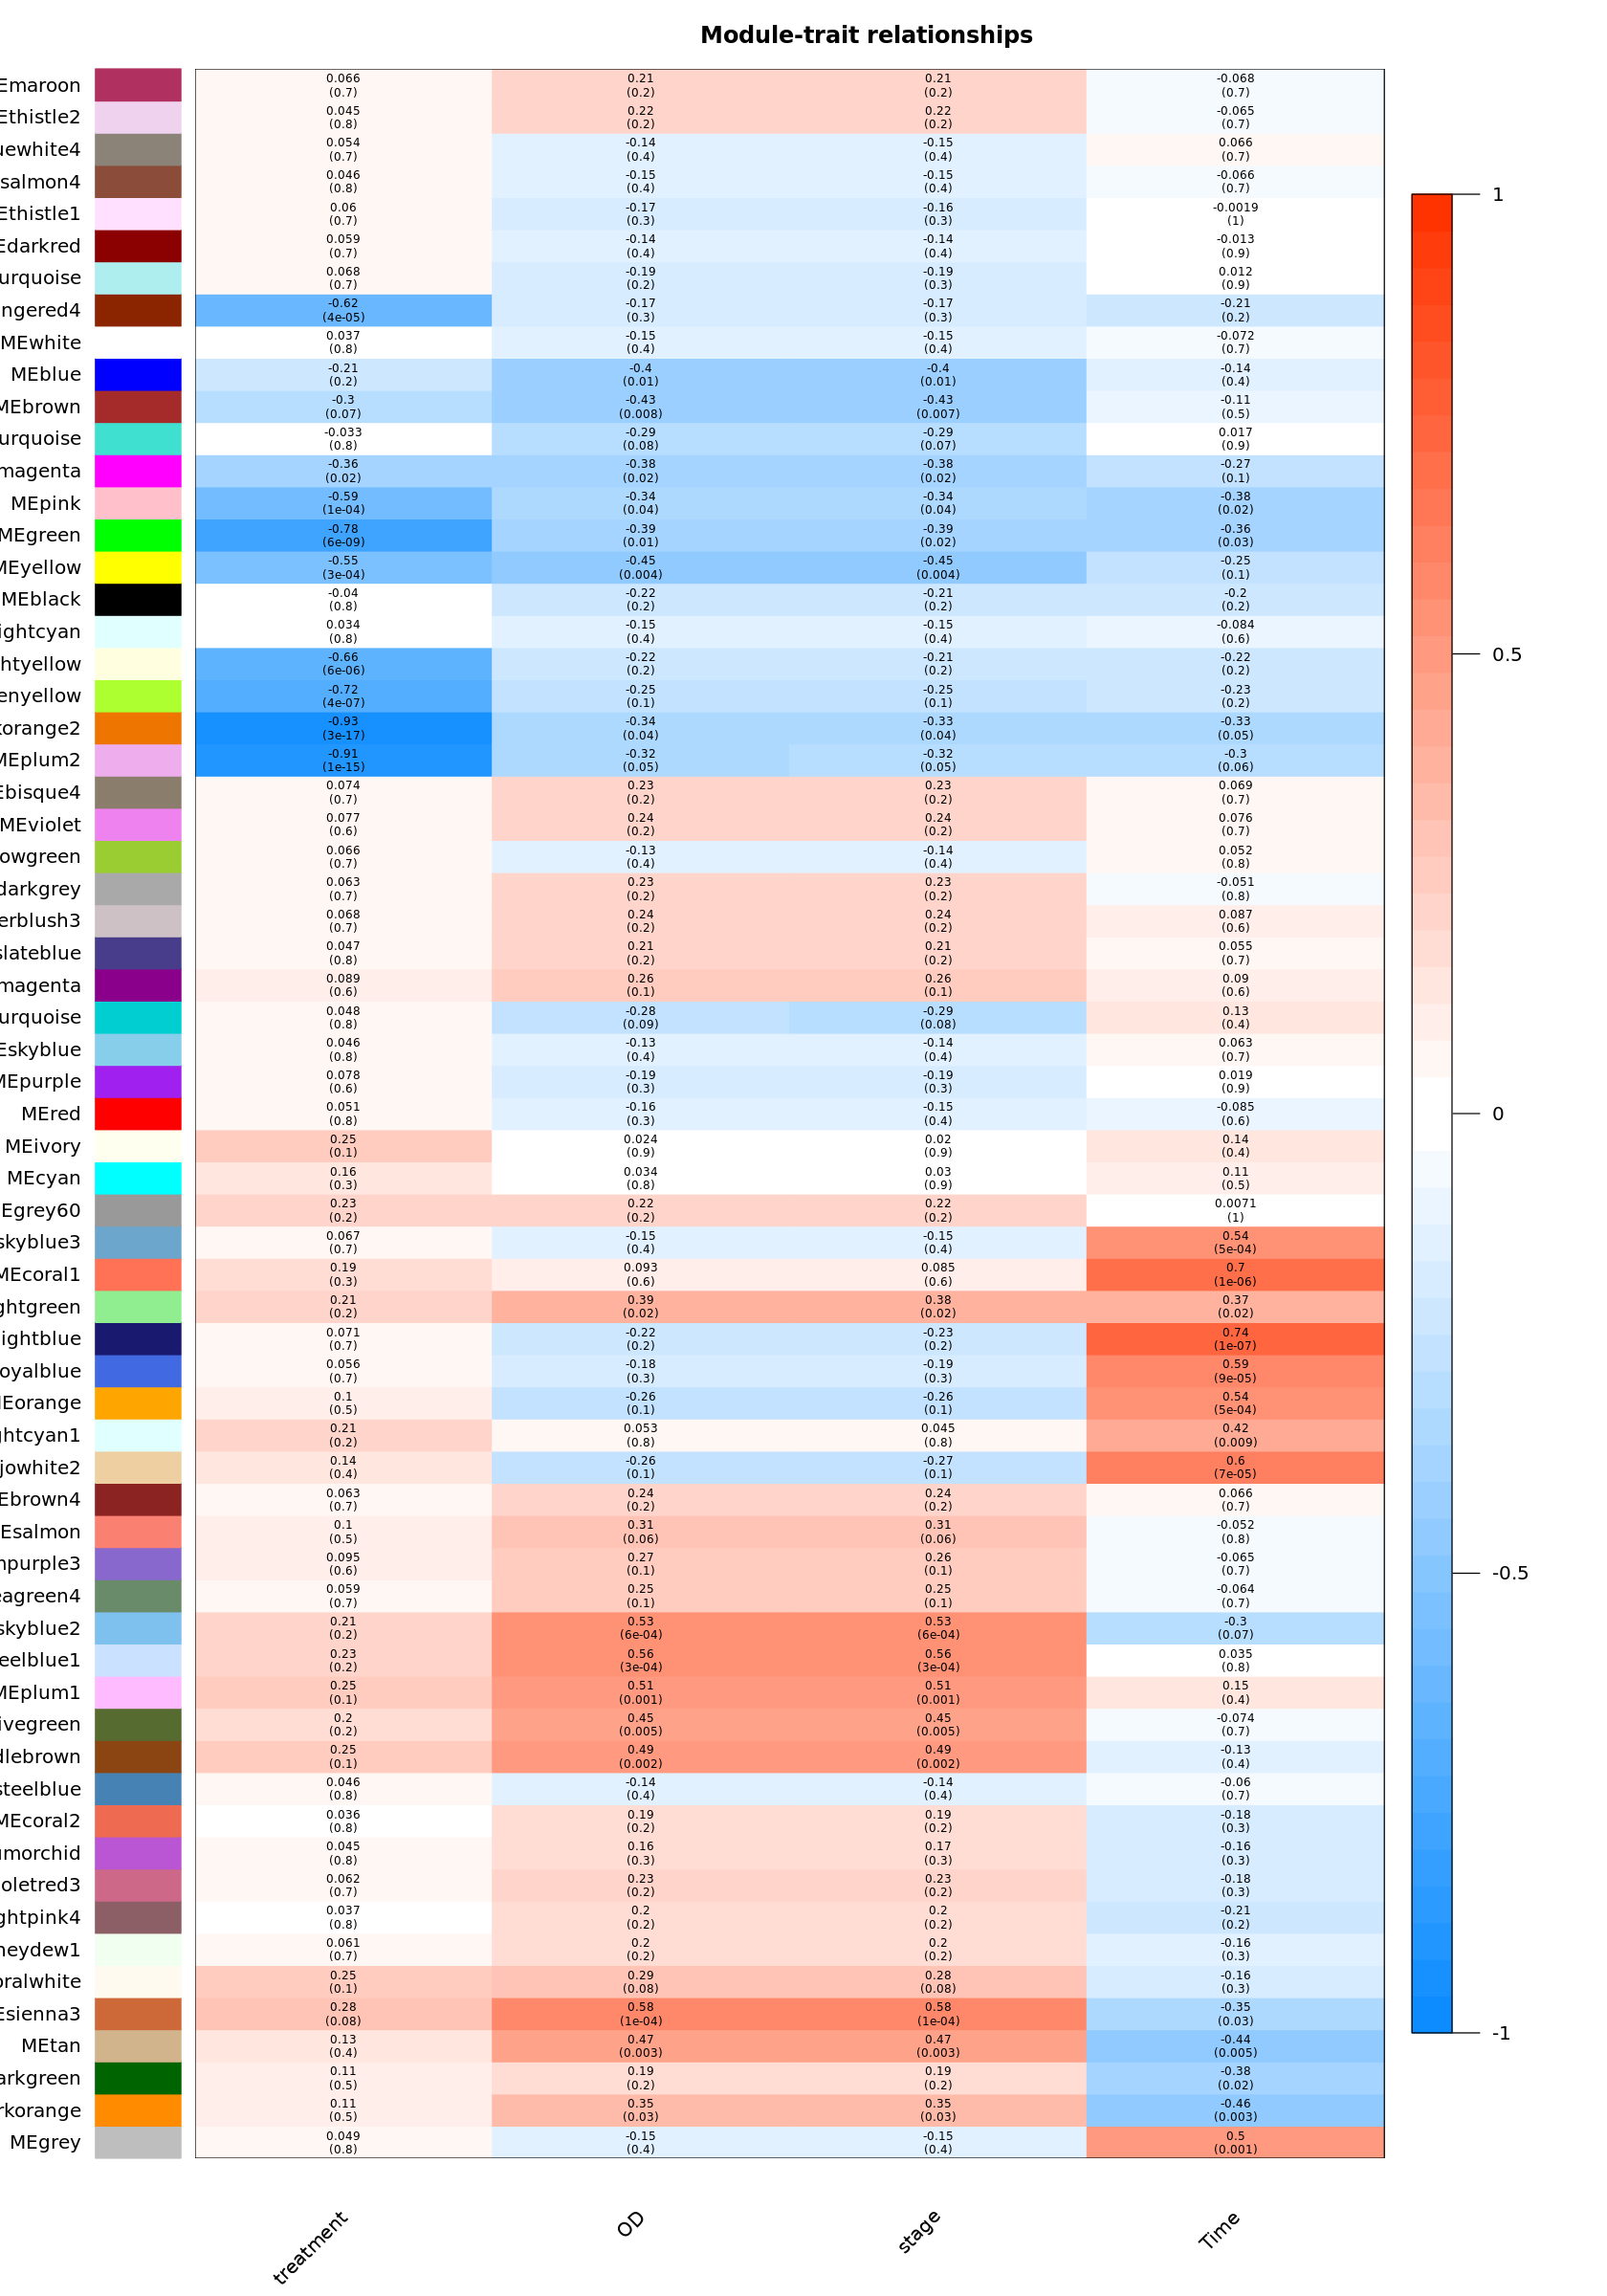

In [47]:
options(repr.plot.width=14, repr.plot.height=20)
# Will display correlations and their p-values
textMatrix =  paste(signif(moduleTraitCor, 2), "\n(",
                           signif(moduleTraitPvalue, 1), ")", sep = "");
dim(textMatrix) = dim(moduleTraitCor)
par(mar = c(6, 8.5, 3, 3));
# Display the correlation values within a heatmap plot
labeledHeatmap(Matrix = moduleTraitCor,
               xLabels = names(datTraits),
               yLabels = names(MEs),
               ySymbols = names(MEs),
               colorLabels = FALSE,
               colors = blueWhiteRed(50),
               textMatrix = textMatrix,
               setStdMargins = FALSE,
               cex.text = 0.6,
               zlim = c(-1,1),
               main = paste("Module-trait relationships"))

In [46]:
# Define variable weight containing the weight column of datTrait
treatment = as.data.frame(datTraits$treatment);
names(treatment) = "treatment"
# names (colors) of the modules
modNames = substring(names(MEs), 3)

geneModuleMembership = as.data.frame(cor(datExpr, MEs, use = "p"));
MMPvalue = as.data.frame(corPvalueStudent(as.matrix(geneModuleMembership), nSamples));

names(geneModuleMembership) = paste("MM", modNames, sep="");
names(MMPvalue) = paste("p.MM", modNames, sep="");

geneTraitSignificance = as.data.frame(cor(datExpr, treatment, use = "p"));
GSPvalue = as.data.frame(corPvalueStudent(as.matrix(geneTraitSignificance), nSamples));

names(geneTraitSignificance) = paste("GS.", names(treatment), sep="");
names(GSPvalue) = paste("p.GS.", names(treatment), sep="");

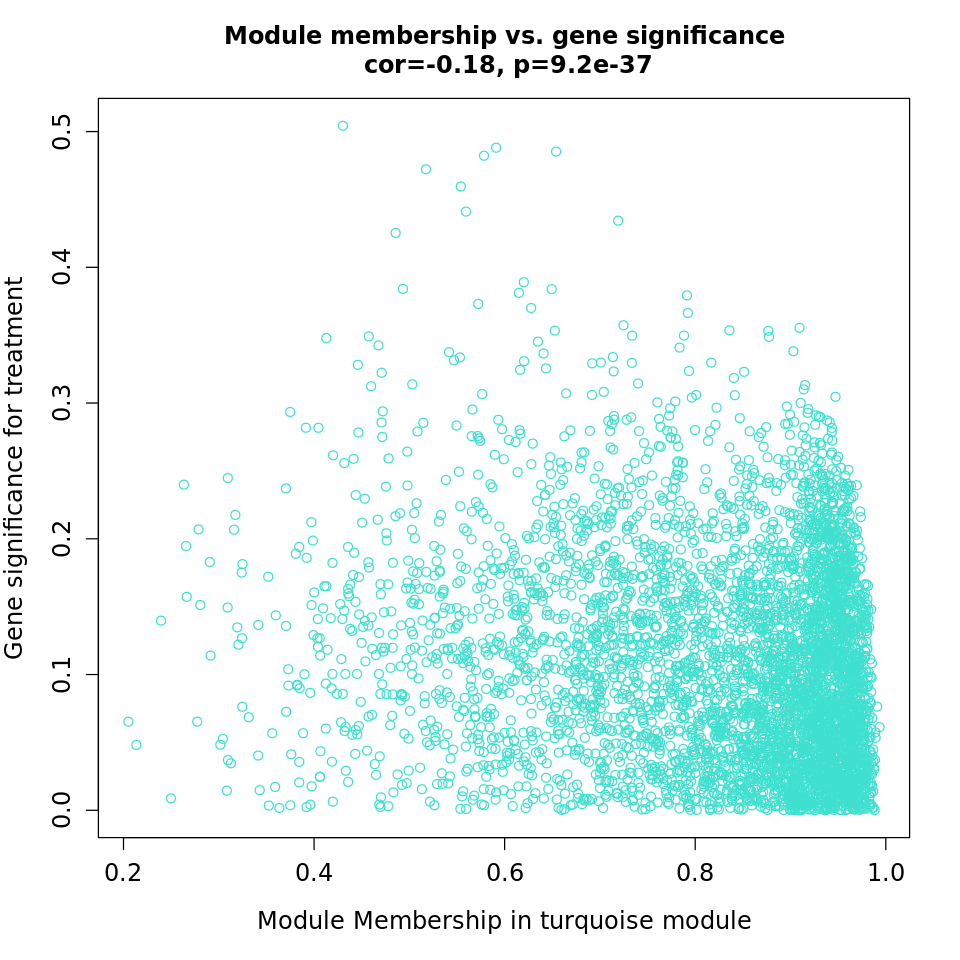

In [55]:
# floralwhite
module = "turquoise"
column = match(module, modNames);
moduleGenes = moduleColors==module;

options(repr.plot.width=8, repr.plot.height=8)
par(mfrow = c(1,1));
verboseScatterplot(abs(geneModuleMembership[moduleGenes, column]),
                   abs(geneTraitSignificance[moduleGenes, 1]),
                   xlab = paste("Module Membership in", module, "module"),
                   ylab = "Gene significance for treatment",
                   main = paste("Module membership vs. gene significance\n"),
                   cex.main = 1.2, cex.lab = 1.2, cex.axis = 1.2, col = module)

In [56]:
length(names(datExpr)[moduleColors=="turquoise"])

[1] 4873

In [52]:
annot = read.csv(file = "./data/GeneAnnotation.csv");
dim(annot)
names(annot)
probes = names(datExpr)
probes2annot = match(probes, annot$X)
# The following is the number or probes without annotation:
sum(is.na(probes2annot))
# Should return 0.

[1] 18427     3

[1] "X"           "LocusLinkID" "gene_symbol"

[1] 12239

In [53]:
# Create the starting data frame
geneInfo0 = data.frame(gene_id = probes,
                      geneSymbol = annot$gene_symbol[probes2annot],
                      LocusLinkID = annot$LocusLinkID[probes2annot],
                      moduleColor = moduleColors,
                      geneTraitSignificance,
                      GSPvalue)
# Order modules by their significance for weight
modOrder = order(-abs(cor(MEs, treatment, use = "p")));
# Add module membership information in the chosen order
for (mod in 1:ncol(geneModuleMembership))
{
  oldNames = names(geneInfo0)
  geneInfo0 = data.frame(geneInfo0, geneModuleMembership[, modOrder[mod]], 
                         MMPvalue[, modOrder[mod]]);
  names(geneInfo0) = c(oldNames, paste("MM.", modNames[modOrder[mod]], sep=""),
                       paste("p.MM.", modNames[modOrder[mod]], sep=""))
}
# Order the genes in the geneInfo variable first by module color, then by geneTraitSignificance
geneOrder = order(geneInfo0$moduleColor, -abs(geneInfo0$GS.treatment));
geneInfo = geneInfo0[geneOrder, ]

In [54]:
write.csv(geneInfo, file = "geneInfo.csv")

---------

# 4. Interfacing network analysis with other data such as functional annotation and gene ontology

In [39]:
# Read in the probe annotation
annot = read.csv(file = "./data/GeneAnnotation.csv");
# Match probes in the data set to the probe IDs in the annotation file 
probes = names(datExpr)
probes2annot = match(probes, annot$X)
# Get the corresponding Locuis Link IDs
allLLIDs = annot$LocusLinkID[probes2annot];
# $ Choose interesting modules
intModules = c("pink", "brown", "black")
for (module in intModules)
{
  # Select module probes
  modGenes = (moduleColors==module)
  # Get their entrez ID codes
  modLLIDs = allLLIDs[modGenes];
  # Write them into a file
  fileName = paste("LocusLinkIDs-", module, ".txt", sep="");
  write.table(as.data.frame(modLLIDs), file = fileName,
              row.names = FALSE, col.names = FALSE)
}
# As background in the enrichment analysis, we will use all probes in the analysis.
fileName = paste("LocusLinkIDs-all.txt", sep="");
write.table(as.data.frame(allLLIDs), file = fileName,
            row.names = FALSE, col.names = FALSE)

-------

# 6. Exporting network data to network visualization software

### 6.a Exporting to VisANT

In [64]:
# Recalculate topological overlap
# TOM = TOMsimilarityFromExpr(datExpr, power = 6);
# Read in the annotation file
annot = read.csv(file = "./data/GeneAnnotation.csv");
# Select module
module = "pink";
# Select module probes
probes = names(datExpr)
inModule = (moduleColors==module);
modProbes = probes[inModule];
# Select the corresponding Topological Overlap
modTOM = TOM[inModule, inModule];
dimnames(modTOM) = list(modProbes, modProbes)
vis = exportNetworkToVisANT(modTOM,
  file = paste("VisANTInput-", module, ".txt", sep=""),
  weighted = TRUE,
  threshold = 0)

In [62]:
nTop = 30;
IMConn = softConnectivity(datExpr[, modProbes]);
top = (rank(-IMConn) <= nTop)
vis = exportNetworkToVisANT(modTOM[top, top],
  file = paste("VisANTInput-", module, "-top30.txt", sep=""),
  weighted = TRUE,
  threshold = 0)

 softConnectivity: FYI: connecitivty of genes with less than 15 valid samples will be returned as NA.
 ..calculating connectivities.. 


In [63]:
modTOM

,AT1G02250,AT1G02510,AT1G02630,AT1G02670,AT1G02965,AT1G04610,AT1G05530,AT1G05920,AT1G06920,AT1G06925,⋯,AT5G52270,AT5G54067,AT5G58860,AT5G60470,AT5G60553,AT5G60810,AT5G61120,AT5G61690,AT5G61750,AT5G65274
AT1G02250,1.00000000,0.060539192,0.20301561,0.096048071,0.07160859,0.20779329,0.164650154,0.25970113,0.17203594,0.21646241,⋯,0.15576191,0.22242969,0.1945093,0.25150599,0.2547491,0.2547491,0.2547491,0.15603999,0.2547491,0.0486776495
AT1G02510,0.06053919,1.000000000,0.03831150,0.003146818,0.02146946,0.02020435,0.008529975,0.02798079,0.01982210,0.01966425,⋯,0.01919019,0.03508609,0.1144198,0.04598525,0.1652573,0.1652573,0.1652573,0.01751545,0.1652573,0.0009869314
AT1G02630,0.20301561,0.038311503,1.00000000,0.031664095,0.06923716,0.11430061,0.099156201,0.15086491,0.09994723,0.11195727,⋯,0.06510987,0.13837761,0.3912124,0.15607493,0.5545610,0.5545610,0.5545610,0.10000888,0.5545610,0.0281211565
AT1G02670,0.09604807,0.003146818,0.03166409,1.000000000,0.01789790,0.01548392,0.005883487,0.02270844,0.02445467,0.01553154,⋯,0.04428402,0.04064361,0.1162277,0.03544010,0.1329150,0.1329150,0.1329150,0.01640653,0.1329150,0.0009437070
AT1G02965,0.07160859,0.021469465,0.06923716,0.017897898,1.00000000,0.06654002,0.057558503,0.08800931,0.06207835,0.06468705,⋯,0.03323234,0.07565188,0.1328942,0.09166902,0.1830448,0.1830448,0.1830448,0.05161009,0.1830448,0.0737274430
AT1G04610,0.20779329,0.020204347,0.11430061,0.015483920,0.06654002,1.00000000,0.057648200,0.09126004,0.06590676,0.07666980,⋯,0.06793864,0.07358896,0.3787212,0.15105338,0.5337773,0.5337773,0.5337773,0.05200306,0.5337773,0.0170468197
AT1G05530,0.16465015,0.008529975,0.09915620,0.005883487,0.05755850,0.05764820,1.000000000,0.07868962,0.05569799,0.05389412,⋯,0.05209702,0.05408105,0.3419633,0.13110443,0.4642776,0.4642776,0.4642776,0.04462408,0.4642776,0.0079876899
AT1G05920,0.25970113,0.027980790,0.15086491,0.022708438,0.08800931,0.09126004,0.078689624,1.00000000,0.10348800,0.08927723,⋯,0.08238798,0.10427590,0.4967020,0.20227011,0.7105682,0.7105682,0.7105682,0.07028682,0.7105682,0.0203443765
AT1G06920,0.17203594,0.019822100,0.09994723,0.024454668,0.06207835,0.06590676,0.055697992,0.10348800,1.00000000,0.06438482,⋯,0.05445247,0.07446323,0.3323092,0.13623530,0.4699523,0.4699523,0.4699523,0.05056123,0.4699523,0.0161294358
AT1G06925,0.21646241,0.019664246,0.11195727,0.015531539,0.06468705,0.07666980,0.053894121,0.08927723,0.06438482,1.00000000,⋯,0.07486806,0.07145355,0.3723768,0.14664590,0.5194765,0.5194765,0.5194765,0.05107424,0.5194765,0.0254804692
